In [241]:
import numpy as np
from sklearn.linear_model import Perceptron
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# seed
np.random.seed(0)

## Funciones para demostración empírica

In [175]:
"""
    Gamma: retorna el margen
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        gamma: float
"""
def gamma(X, Y):
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    gamma = np.inf
    
    for i in range(X.shape[0]):
        if Y[i] * Y_predicted[i] < gamma:
            gamma = Y[i] * Y_predicted[i]
        
    return gamma

"""
    linearly_separable: Verifica si data es linealmente separable
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        bool
"""
def linearly_separable(X, Y):
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    
    for i in range(X.shape[0]):
        if Y[i] * Y_predicted[i] <= 0:
            return False
        
    return True

"""
    convert_to_ls: borra elementos que no sirven
    input:
        X: numpy array (n, d)
        Y: numpy array (n)
    output:
        X, Y
"""
def convert_to_ls(X, Y):
    
    perceptron = Perceptron(tol=None)
    perceptron.fit(X, Y)
    Y_predicted = perceptron.predict(X)
    Y=np.array(Y)
    X=np.array(X)
    len_Y = Y.shape[0]
    i = 0
    
    while i < len_Y:
        if Y[i] * Y_predicted[i] <= 0:
 #           print(X.shape)
  #          print(Y.shape)
   #         print(i)
    #        print("\n")            
            Y = np.delete(Y, i, 0)
            X = np.delete(X, i, 0)
            Y_predicted = np.delete(Y_predicted, i, 0)
            
            len_Y = Y.shape[0]
        else :
            i += 1
    
    return X, Y

"""
    max_norm: calcula la maxima norma de los vectores filas de X,
        donde cada x_i es un vecetor de atributos
    input:
        X: numpy array
    output:
        max_norm_x: float
"""
def max_norm(X):
    max_norm_x = 0
    for x in X:
        if np.linalg.norm(x) >= max_norm_x:
            max_norm_x = np.linalg.norm(x)
    return max_norm_x

# Dataset 1

## Carga data

In [176]:
data = pd.read_csv('datasets/breast-cancer-wisconsin.csv', sep=",")

data.columns = [
    "ID",
    "Clump Thickness",
    "Uniformity of Cell Size",
    "Uniformity of Cell Shape",
    "Marginal Adhesion",
    "Single Epithelial Cell Size",
    "Bare Nuclei",
    "Bland Chromatin",
    "Normal Nucleoli",
    "Mitoses",
    "Result"
]

print("Shape breast cancer wisconsin: ", data.shape)

Shape breast cancer wisconsin:  (698, 11)


## Imputación (borrar nan) y detalles encoding

In [177]:
data = data.drop("ID", axis=1)

data = data.replace(['?'], np.nan)

#imputer = KNNImputer(n_neighbors=5)
print("Cuántos Nan hay?: ", data.isna().sum())
data = data.dropna()
print("Cuántos Nan hay con dropna?: ", data.isna().sum())
print(data)
#data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)
aux = pd.DataFrame.to_numpy(data)
data = pd.DataFrame(aux, columns = data.columns)

"""data.loc[data['Result'] == "Benign", 'Result'] = 2
data.loc[data['Result'] == "Malignant", 'Result'] = 4
"""

data.loc[data['Result'] == 2, 'Result'] = "Benign"
data.loc[data['Result'] == 4, 'Result'] = "Malignant"

print("Shape breast cancer wisconsin: ", data.shape)

Cuántos Nan hay?:  Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Result                          0
dtype: int64
Cuántos Nan hay con dropna?:  Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Result                         0
dtype: int64
     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        4                         4   
1                  3                        1                         1   
2                  6          

## Análisis exploratorio

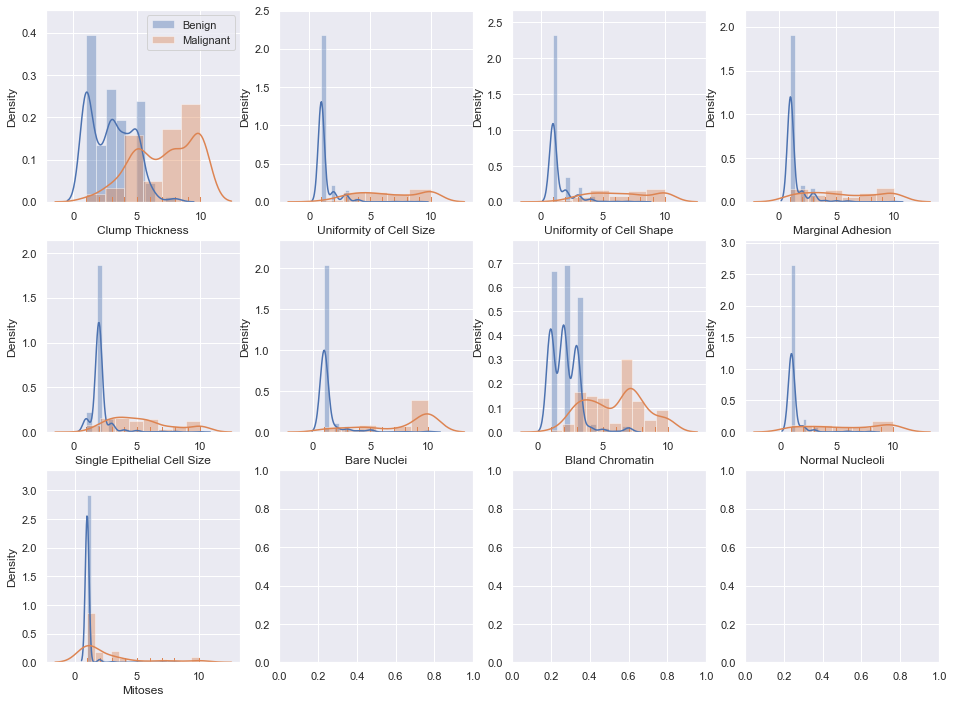

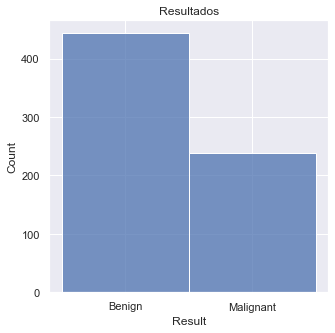

In [178]:
fig, axes = plt.subplots(figsize=(16, 12), nrows=3, ncols=4)

for i, column in enumerate(data.columns[:-1]):
    for result in ["Benign", "Malignant"]:
        target = data.loc[data['Result'] == result]
        sns.distplot(target[column], rug=True, kde=True, ax=axes[i//4,i%4], label=result)
    if i==0:
        axes[0,0].legend()
        
"""data.loc[data['Result'] == "Benign", 'Result'] = 2
data.loc[data['Result'] == "Malignant", 'Result'] = 4"""

fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["Result"], palette="Blues_d",ax=ax, label=["Benign", "Malignant"])
ax.set_title('Resultados')
plt.show()

## División data

In [179]:
data.loc[data["Result"] == "Benign" ,"Result"] = 1
data.loc[data["Result"] == "Malignant", "Result"] = -1

data["Result"] = data["Result"].astype(int)

data = data.astype(int)

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["Result"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

## $\gamma$, R y cota

In [180]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 28.5657137141714
Gamma:  -1
Cota:  816.0000000000001
Linealmente separables?: False


## Perceptrón directo

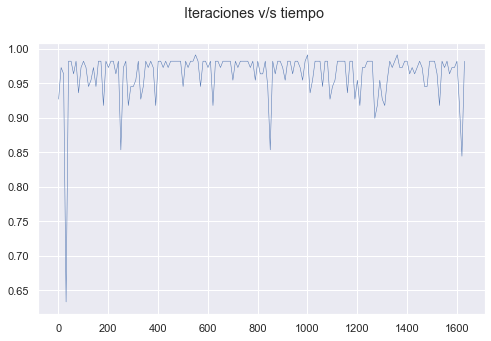

In [181]:
scores = list()
no_iterations = range(1, int(bound*2), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

## Perceptrón con datos linealmente separables

Datos convertidos?: True
R: 28.5657137141714
Gamma:  1
Cota:  816.0000000000001
Linealmente separables?: True


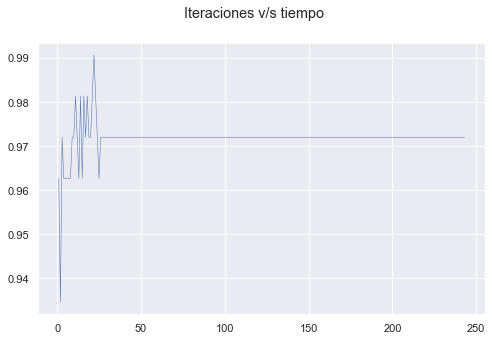

In [182]:
X, y = convert_to_ls(X.to_numpy(), y.to_numpy())
print("Datos convertidos?:", linearly_separable(X, y))

X = pd.DataFrame(X)
y = pd.Series(y)

info = X

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

scores = list()
no_iterations = range(1, int(bound*0.3), 1)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

# Dataset 2

## Carga dataset

In [198]:
data = pd.read_csv('datasets/Skin_NonSkin.txt', sep="\t")
print("Nan?: \n", data.isna().sum())

data.columns = ["B", "G", "R", "SkinNonSkin"]
print("Shape SkinNonSkin: ", data.shape)

data = data[0:int(data.shape[0]/4)]
print(data.shape)

Nan?: 
 74     0
85     0
123    0
1      0
dtype: int64
Shape SkinNonSkin:  (245056, 4)
(61264, 4)


## Análisis exploratorio

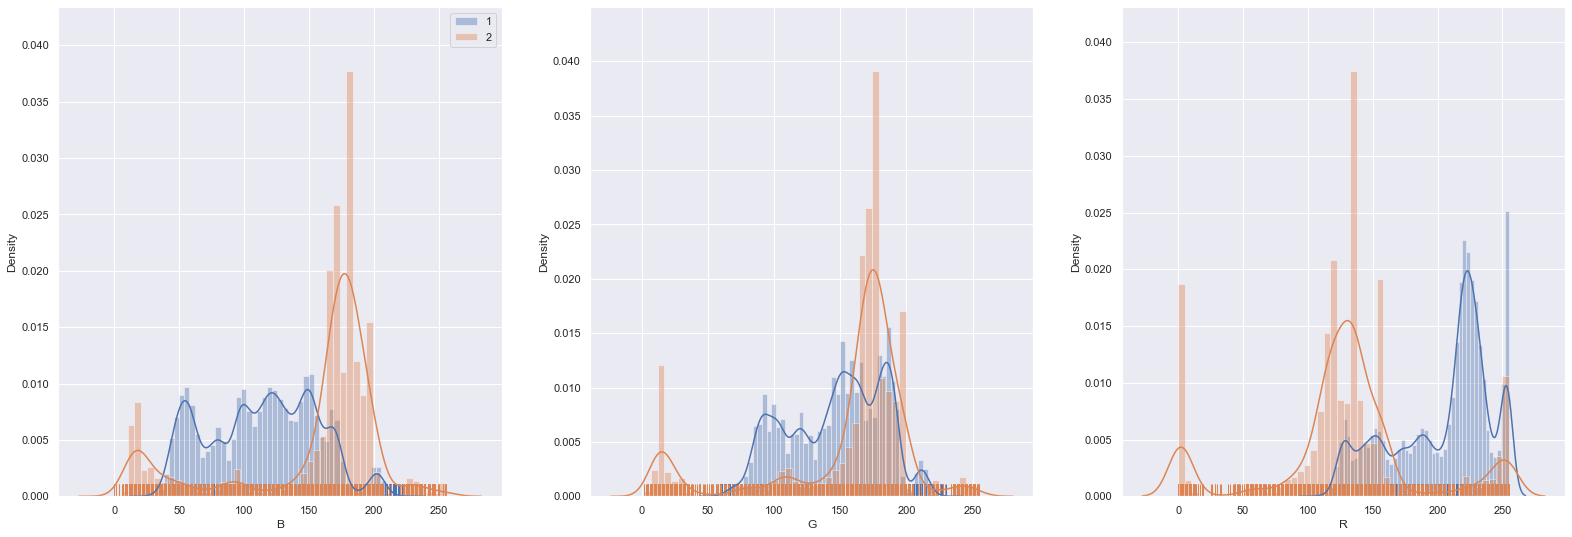

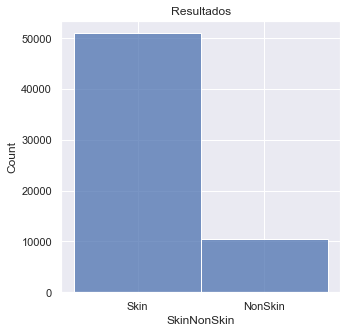

         B    G    R SkinNonSkin
0       73   84  122        Skin
1       72   83  121        Skin
2       70   81  119        Skin
3       70   81  119        Skin
4       69   80  118        Skin
...    ...  ...  ...         ...
61259  162  160  106     NonSkin
61260  163  161  107     NonSkin
61261  163  160  109     NonSkin
61262  164  161  110     NonSkin
61263  166  163  112     NonSkin

[61264 rows x 4 columns]


In [199]:
fig, axes = plt.subplots(figsize=(9*3, 9), nrows=1, ncols=3)

"""data[data["SkinNonSkin"]==1] = "Skin"
data[data["SkinNonSkin"]==2] = "NonSkin" """

for i, column in enumerate(data.columns[:-1]):
    for result in [1, 2]:
        target = data.loc[data['SkinNonSkin'] == result]
        sns.distplot(target[column], rug=True, kde=True, ax=axes[i], label=result)
    if i==0:
        axes[0].legend()

data.loc[data["SkinNonSkin"] == 1, "SkinNonSkin"] = "Skin"
data.loc[data["SkinNonSkin"] == 2, "SkinNonSkin"] = "NonSkin"

fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["SkinNonSkin"], palette="Blues_d",ax=ax, label=["Skin", "NonSkin"])
ax.set_title('Resultados')
plt.show()

print(data)

## División data

In [200]:
data.loc[data["SkinNonSkin"] == "Skin", "SkinNonSkin"] = 1
data.loc[data["SkinNonSkin"] == "NonSkin", "SkinNonSkin"] = -1

data["SkinNonSkin"] = data["SkinNonSkin"].astype(int)

predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]
y = data["SkinNonSkin"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.9, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.9, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

print(X_train_vals.shape)

(612, 3)


## $\gamma$, R y cota

In [201]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 416.37603197110184
Gamma:  -1
Cota:  173369.00000000003
Linealmente separables?: False


## Perceptrón directo

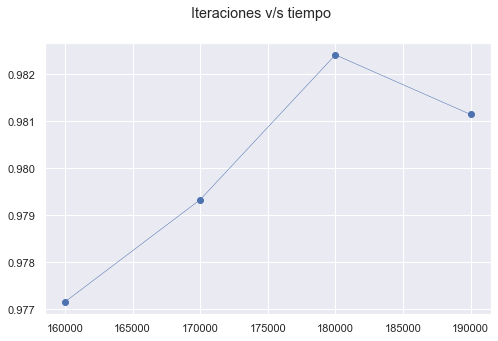

In [204]:
scores = list()
no_iterations = range(160000, int(bound*1.1), 10000)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Perceptrón con datos linealmente separables

Datos convertidos?: True
R: 410.54841371024685
Gamma:  1
Cota:  168550.0


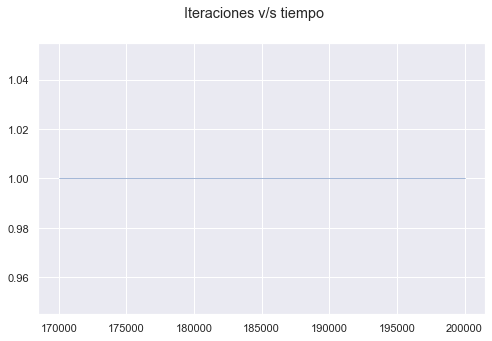

In [205]:
X, Y = convert_to_ls(X.to_numpy(), y.to_numpy())

print("Datos convertidos?:", linearly_separable(X, Y))


max_norm_dataset_2 = max_norm(X)
g = gamma(X, Y)
bound = max_norm_dataset_2**2 / g**2

print("R:", max_norm_dataset_2)
print("Gamma: ", g)
print("Cota: ", bound)

scores = list()
no_iterations = range(170000, int(bound*1.2), 10000)

X = pd.DataFrame(X)
y = pd.Series(Y)

info = X

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)

    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-', linewidth=0.5)

# Dataset 3

### Para el dataset Iris, separamos los datos en 3 subdataset, donde el subdataset de las clases tipos Virginica-Versicolor es no-lineal, y los subdataset de Setosa-Virginica y Setosa-Versicolor  son linealmente separables.

## Análisis  Dataset Virginica-Versicolor

## Carga data

In [206]:
data = pd.read_csv('datasets/iris-virgi-versi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Virginica-Versicolor: ", data.shape)

Shape subdataset Virginica-Versicolor:  (99, 5)


## Análisis exploratorio

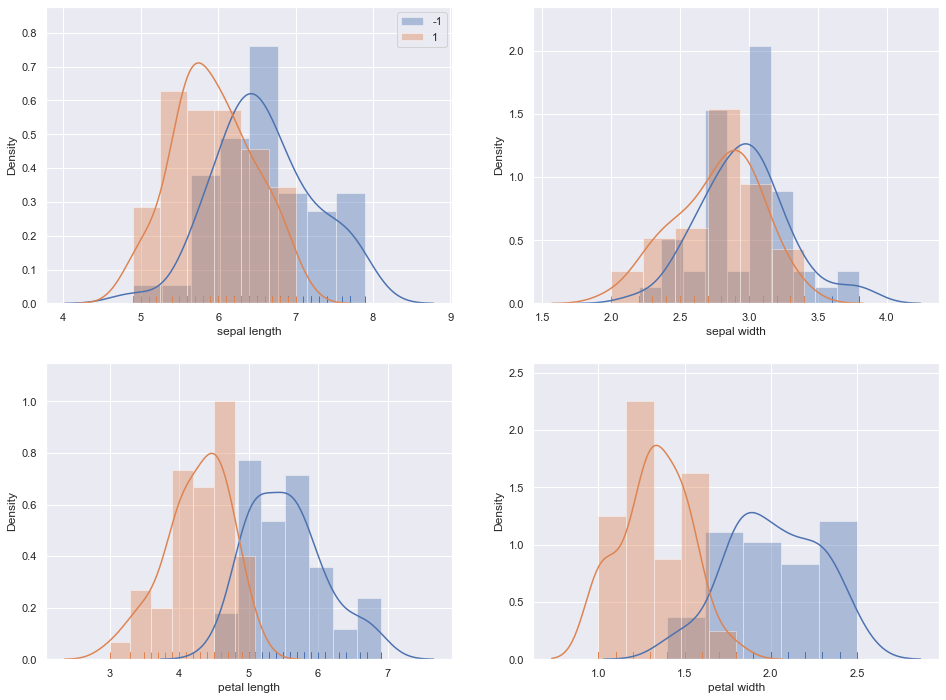

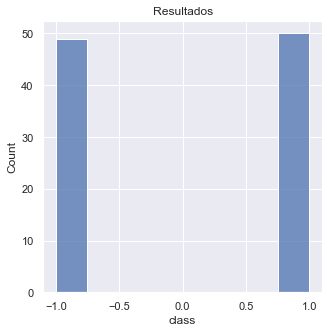

In [207]:
data.loc[data['class'] == 'Iris-virginica', 'class'] = -1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [208]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

    sepal length  sepal width  petal length  petal width  class
0            5.8          2.7           5.1          1.9     -1
1            7.1          3.0           5.9          2.1     -1
2            6.3          2.9           5.6          1.8     -1
3            6.5          3.0           5.8          2.2     -1
4            7.6          3.0           6.6          2.1     -1
..           ...          ...           ...          ...    ...
94           5.7          3.0           4.2          1.2      1
95           5.7          2.9           4.2          1.3      1
96           6.2          2.9           4.3          1.3      1
97           5.1          2.5           3.0          1.1      1
98           5.7          2.8           4.1          1.3      1

[99 rows x 5 columns]


## $\gamma$, R y cota

In [213]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 10.906420127612911
Gamma:  1
Cota:  118.95000000000003
Linealmente separables?: True


## Perceptrón directo

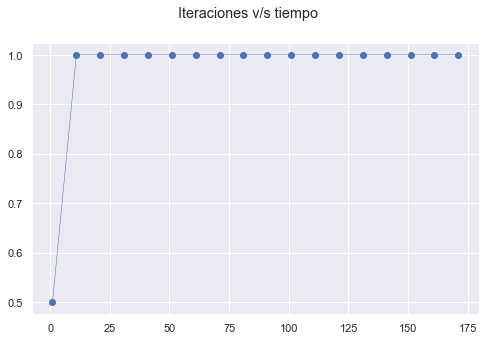

In [214]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)  
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Perceptrón con datos linealmente separables

Datos convertidos?: True
R: 10.906420127612911
Gamma:  1
Cota:  118.95000000000003
Linealmente separables?: True


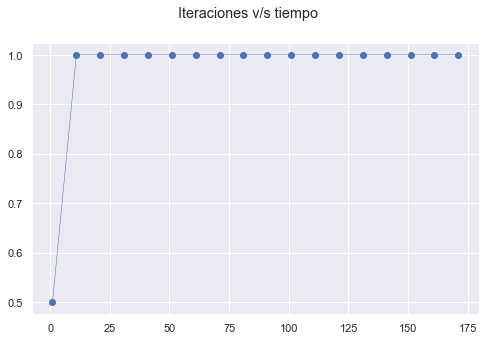

In [215]:
predictors = data.columns[:-1]
X = data[predictors]
y = data["class"]
X, y = convert_to_ls(X.to_numpy(), y.to_numpy())
print("Datos convertidos?:", linearly_separable(X, y))

X = pd.DataFrame(X)
y = pd.Series(y)

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, X, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

scores = list()
no_iterations = range(1, int(bound*1.5), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Análisis  Dataset Setosa-Versicolor

## Carga data

In [216]:
data = pd.read_csv('datasets/iris-setosa-versi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Setosa-Versicolor: ", data.shape)

Shape subdataset Setosa-Versicolor:  (99, 5)


## Análisis exploratorio

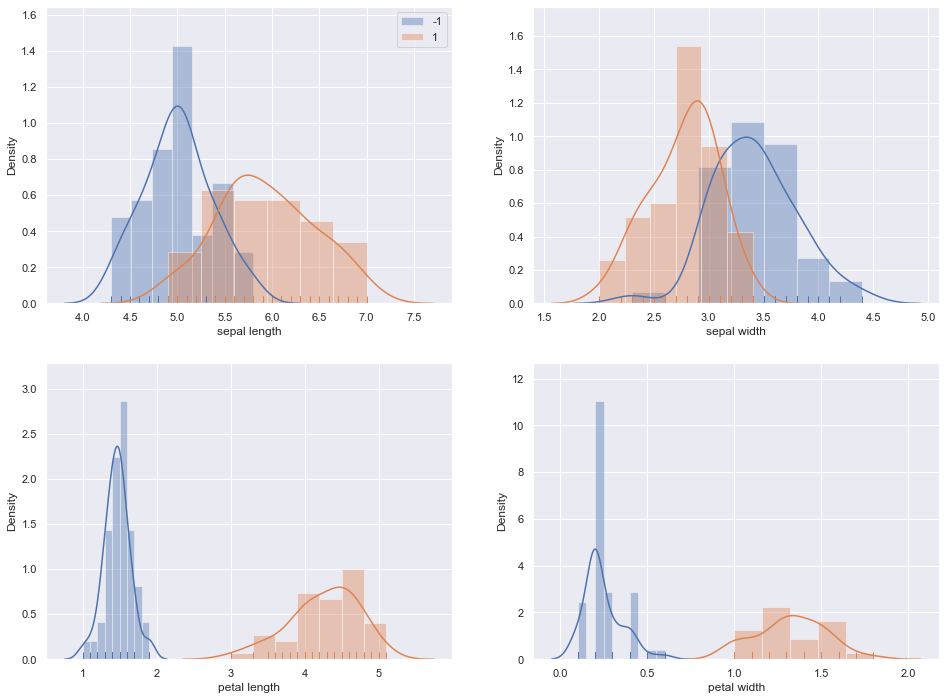

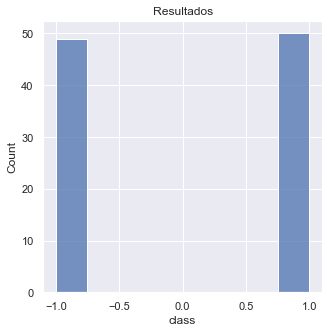

In [217]:
data.loc[data['class'] == 'Iris-setosa', 'class'] = -1
data.loc[data['class'] == 'Iris-versicolor', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [218]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

    sepal length  sepal width  petal length  petal width  class
0            4.9          3.0           1.4          0.2     -1
1            4.7          3.2           1.3          0.2     -1
2            4.6          3.1           1.5          0.2     -1
3            5.0          3.6           1.4          0.2     -1
4            5.4          3.9           1.7          0.4     -1
..           ...          ...           ...          ...    ...
94           5.7          3.0           4.2          1.2      1
95           5.7          2.9           4.2          1.3      1
96           6.2          2.9           4.3          1.3      1
97           5.1          2.5           3.0          1.1      1
98           5.7          2.8           4.1          1.3      1

[99 rows x 5 columns]


## $\gamma$, R y cota

In [219]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 9.136739024400336
Gamma:  1
Cota:  83.48
Linealmente separables?: True


## Perceptrón directo

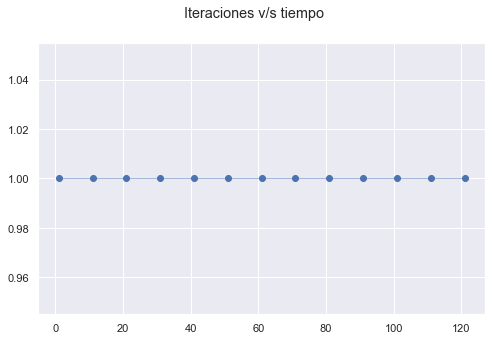

In [220]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)

for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals) 
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Análisis  Dataset Setosa-Virginica

## Carga data

In [221]:
data = pd.read_csv('datasets/iris-setosa-virgi.data', sep=",")

data.columns = [
    "sepal length",
    "sepal width",
    "petal length",
    "petal width",
    "class"    
]

print("Shape subdataset Setosa-Virginica: ", data.shape)

Shape subdataset Setosa-Virginica:  (99, 5)


## Análisis exploratorio

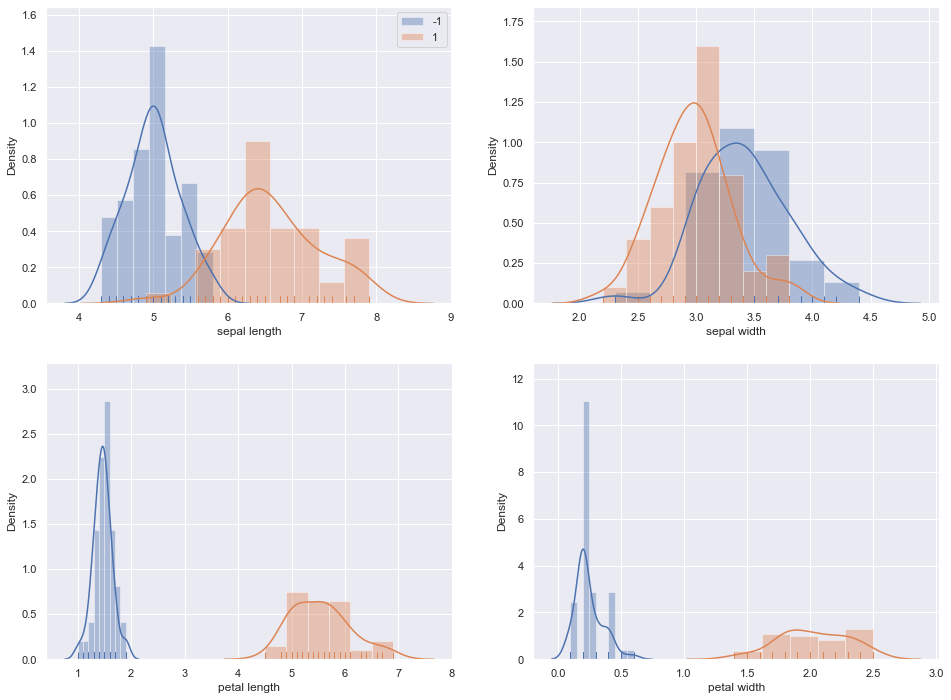

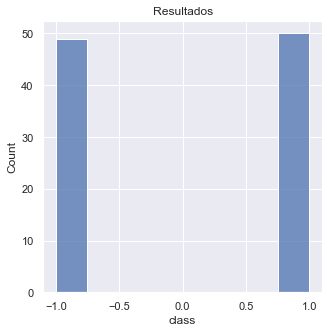

In [222]:
data.loc[data['class'] == 'Iris-setosa', 'class'] = -1
data.loc[data['class'] == 'Iris-virginica', 'class'] = 1

fig, axes = plt.subplots(figsize=(16, 12), nrows=2, ncols=2)
for i, column in enumerate(data.columns[:-1]):
    for result in [-1, 1]:
      target = data.loc[data['class'] == result]
      sns.distplot(target[column], rug=True, kde=True, ax=axes[i//2,i%2], label=result)
      if i==0:
        axes[0,0].legend()
        
fig, ax = plt.subplots(figsize=(5, 5),nrows=1)
sns.histplot(data=data["class"], palette="Blues_d",ax=ax, label=["Iris-virginica", "Iris-versicolor"])
ax.set_title('Resultados')
plt.show()

## División data

In [223]:
data["class"] = data["class"].astype(int)
print(data)
predictors = data.columns[:-1]
X = data[predictors]
info = data[predictors]

y = data["class"]

X_train, X_test, y_train, y_test, info_train, info_test = train_test_split(X, y, info, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val, info_train, info_val = train_test_split(X_train, y_train, info_train, test_size=0.2, random_state=0)

X_train_vals = X_train.values; y_train_vals = y_train.values;
X_val_vals = X_val.values; y_val_vals = y_val.values;
X_test_vals = X_test.values; y_test_vals = y_test.values;

    sepal length  sepal width  petal length  petal width  class
0            4.9          3.0           1.4          0.2     -1
1            4.7          3.2           1.3          0.2     -1
2            4.6          3.1           1.5          0.2     -1
3            5.0          3.6           1.4          0.2     -1
4            5.4          3.9           1.7          0.4     -1
..           ...          ...           ...          ...    ...
94           6.7          3.0           5.2          2.3      1
95           6.3          2.5           5.0          1.9      1
96           6.5          3.0           5.2          2.0      1
97           6.2          3.4           5.4          2.3      1
98           5.9          3.0           5.1          1.8      1

[99 rows x 5 columns]


## $\gamma$, R y cota

In [224]:
max_norm_dataset_1 = max_norm(X_train_vals)
g = gamma(X_train_vals, y_train_vals)
bound = max_norm_dataset_1**2 / g**2

print("R:", max_norm_dataset_1)
print("Gamma: ", g)
print("Cota: ", bound)
print("Linealmente separables?:", linearly_separable(X_train_vals, y_train_vals))

R: 11.11125555461668
Gamma:  1
Cota:  123.46000000000002
Linealmente separables?: True


## Perceptrón directo

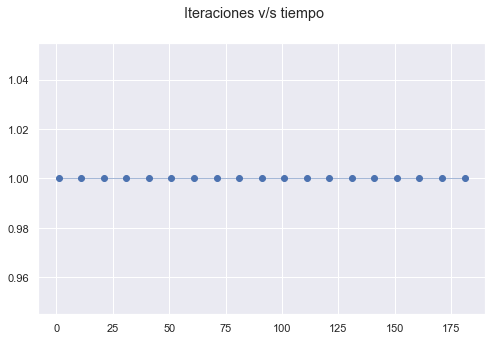

In [226]:
scores = list()
no_iterations = range(1, int(bound*1.5), 10)
for i in no_iterations:
    perceptron = Perceptron(tol=None, max_iter=i)
    perceptron.fit(X_train_vals, y_train_vals)
    scores.append(perceptron.score(X_val_vals, y_val_vals))
    
fig, ax1 = plt.subplots(figsize=(8, 5))

fig.suptitle('Iteraciones v/s tiempo')

ax1.plot(no_iterations, scores, '-o', linewidth=0.5)

## Referencias

* División de ejemplo por train, test y eval. notebooks profesor Ricardo Ñanculef. 

### Datasets

#### Binaries

* No Dataset breast-cancer-wisconsin: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)
* SkinNonSkin: https://archive.ics.uci.edu/ml/datasets/skin+segmentation

#### No Binaries
* Iris: http://archive.ics.uci.edu/ml/datasets/Iris/